In [9]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
# Read the dataset
data = pd.read_csv('/Users/priyakundu/Documents/NYU Capstone WaterVue Files/Data Processing/Updated_Dataframe_WaterQual.csv')
data

,Location,Sample Date,Chlorophyll A,Dissolved Oxygen,Salinity,Specific Conductance,Total Nitrogen,Total Phosphorus,Turbidity
0,#1 HILLSBORO CANAL US 1,2006-02-28,12.100000,6.980000,19.400000,10.351373,0.830000,0.086000,2.400000
1,#1 HILLSBORO CANAL US 1,2006-08-31,4.430000,5.540000,15.750000,10.165844,0.981000,0.109000,1.400000
2,#1 HILLSBORO CANAL US 1,2007-02-28,2.605000,6.195000,23.200000,10.501905,0.754000,0.083500,1.650000
3,#1 HILLSBORO CANAL US 1,2007-08-31,4.890000,4.730000,31.100000,10.774781,0.777000,0.094000,2.300000
4,#1 HILLSBORO CANAL US 1,2008-02-29,5.925000,5.770000,12.500000,9.893361,1.440000,0.102000,2.050000
...,...,...,...,...,...,...,...,...,...
853,#89 NOB HILL RD POMPANO CANAL,2020-02-29,3.933333,5.703333,0.310000,6.451930,1.097133,0.014000,0.750000
854,#89 NOB HILL RD POMPANO CANAL,2020-08-31,1.570000,7.760000,0.250000,6.265301,0.910000,0.011000,0.000000
855,#89 NOB HILL RD POMPANO CANAL,2021-02-28,2.966667,5.833333,0.233333,6.153383,0.984033,0.003667,0.566667
856,#89 NOB HILL RD POMPANO CANAL,2021-08-31,5.510000,5.370000,0.270000,6.324359,1.410500,0.049000,0.775000


In [3]:
# Select the numerical columns for clustering
X = data.iloc[:, 2:].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of clusters
n_clusters = 4  # You can adjust this number based on your preference

# Apply KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters

# Calculate the range of each parameter within each cluster
cluster_ranges = data.groupby('Cluster').agg({'Chlorophyll A': ['min', 'max'],
                                              'Dissolved Oxygen': ['min', 'max'],
                                              'Salinity': ['min', 'max'],
                                              'Specific Conductance': ['min', 'max'],
                                              'Total Nitrogen': ['min', 'max'],
                                              'Total Phosphorus': ['min', 'max'],
                                              'Turbidity': ['min', 'max']})

In [4]:
cluster_ranges

Chlorophyll A        Dissolved Oxygen       Salinity         \
                  min    max              min   max      min    max   
Cluster                                                               
0              0.4775   7.02         1.650000  8.14   13.005  35.30   
1              0.4775  14.60         2.616667  9.10    0.180  13.67   
2              0.2310  12.80         2.870000  7.02    0.180  33.40   
3              0.4775   8.67         0.900000  5.08    0.190  13.70   

        Specific Conductance            Total Nitrogen          \
                         min        max            min     max   
Cluster                                                          
0                   9.894584  10.889304         0.2040  1.5000   
1                   5.958425   9.830917         0.3980  2.3800   
2                   6.194405  10.848309         0.2370  1.7235   
3                   5.981414   9.980449         0.1634  2.1100   

        Total Phosphorus         Turbidity        
                     min     max       min   max  
Cluster                                           
0               0.006000  0.0935     0.400  3.00  
1              -0.007500  0.1010     0.000  3.10  
2               0.028333  0.1430     0.000  3.00  
3              -0.004333  0.1000     0.325  2.95

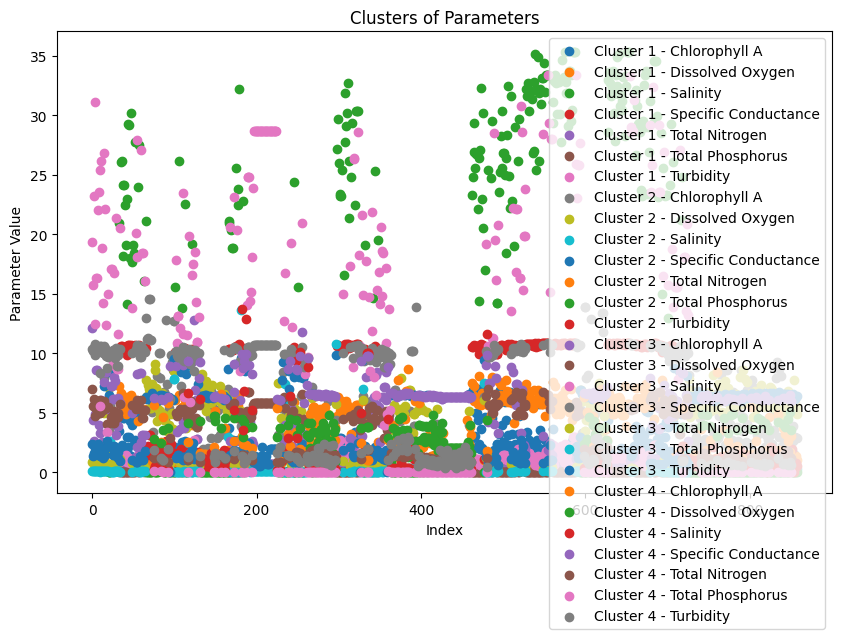

In [6]:
# Plot the clusters
plt.figure(figsize=(10, 6))

for cluster in range(4):
    cluster_indices = data[data['Cluster'] == cluster].index
    cluster_data = data[data['Cluster'] == cluster].iloc[:, 2:-1]
    for col in cluster_data.columns:
        plt.scatter(cluster_indices, cluster_data[col], label=f'Cluster {cluster + 1} - {col}')

plt.xlabel('Index')
plt.ylabel('Parameter Value')
plt.title('Clusters of Parameters')
plt.legend()
plt.show()

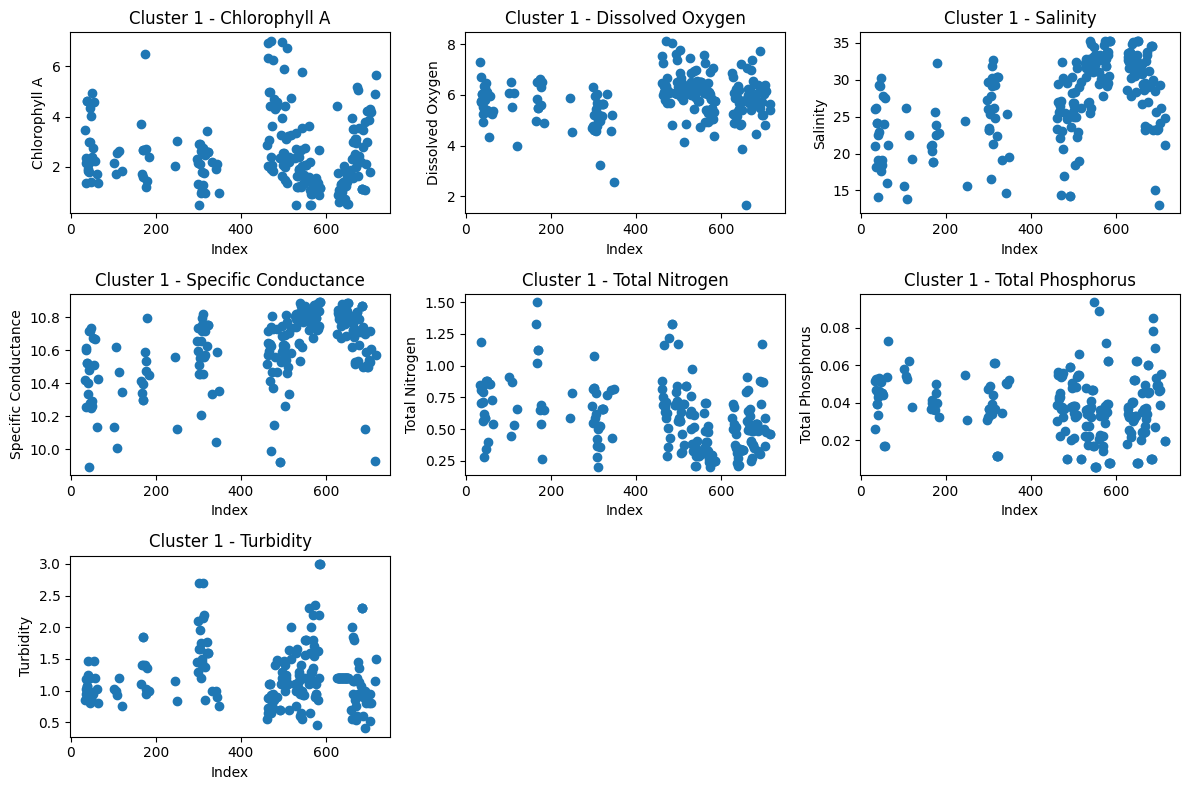

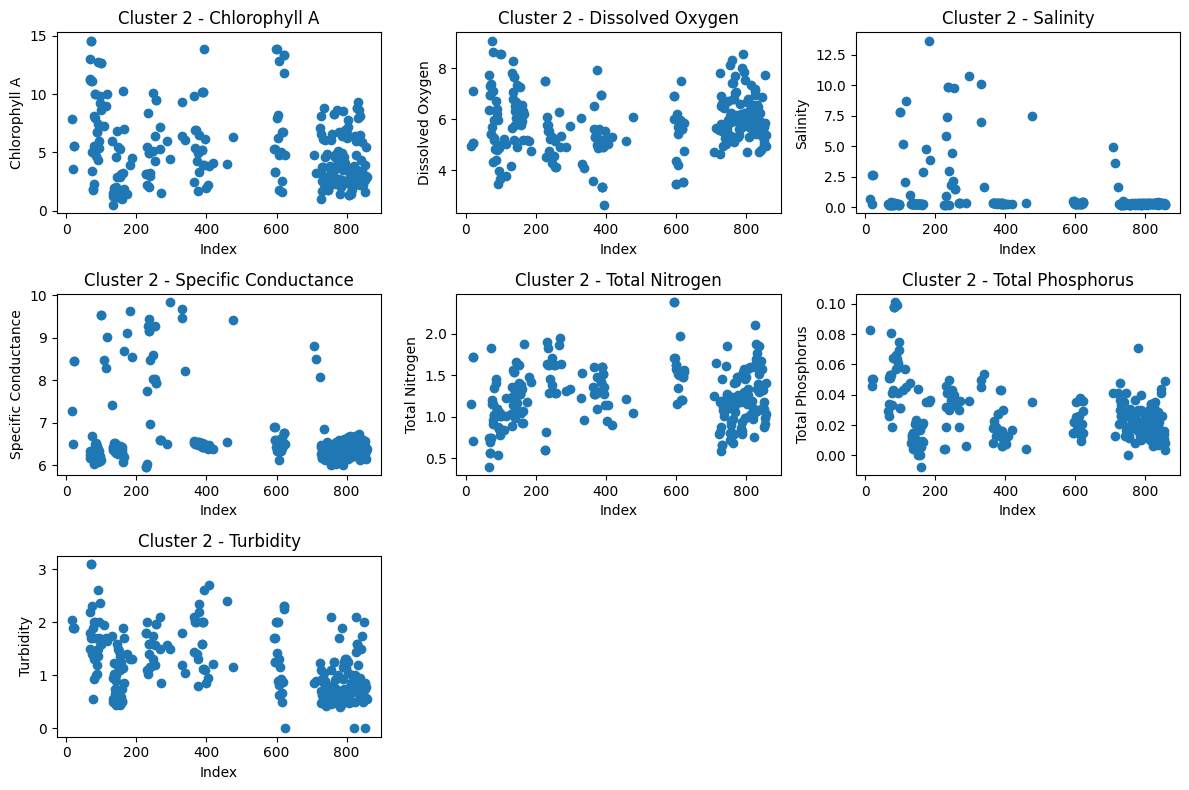

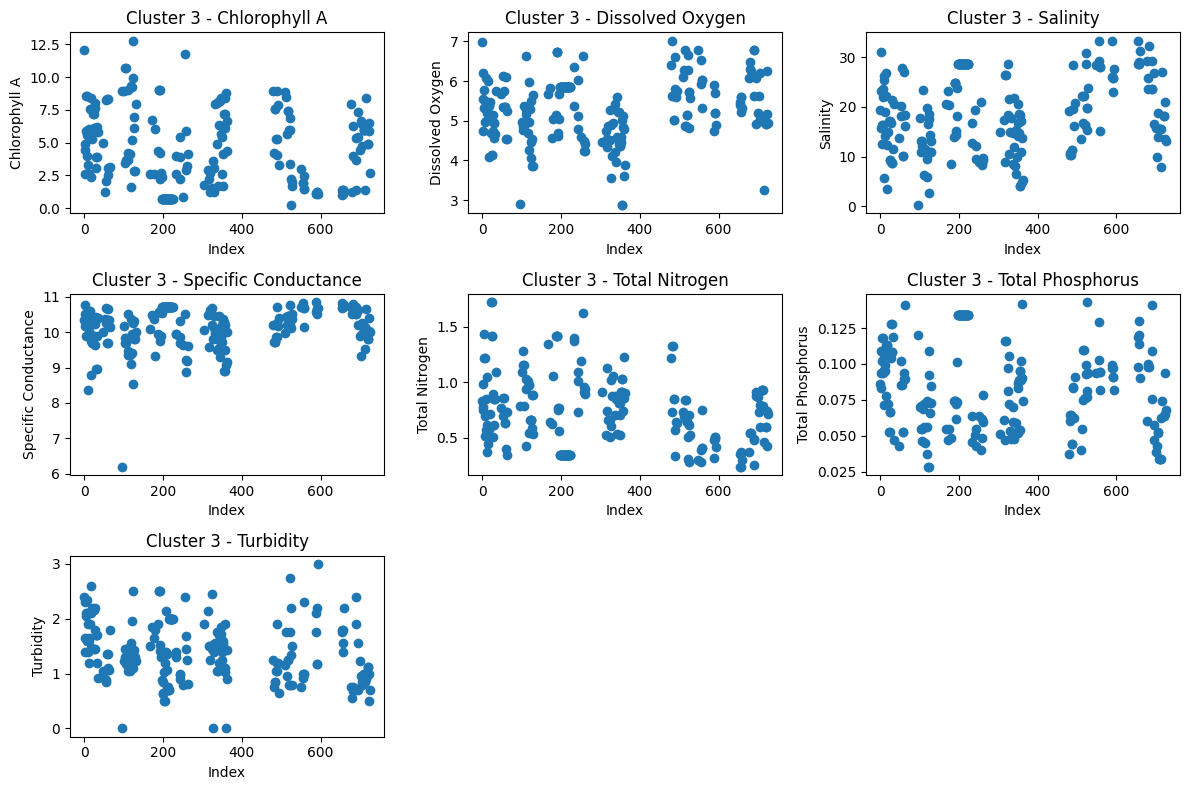

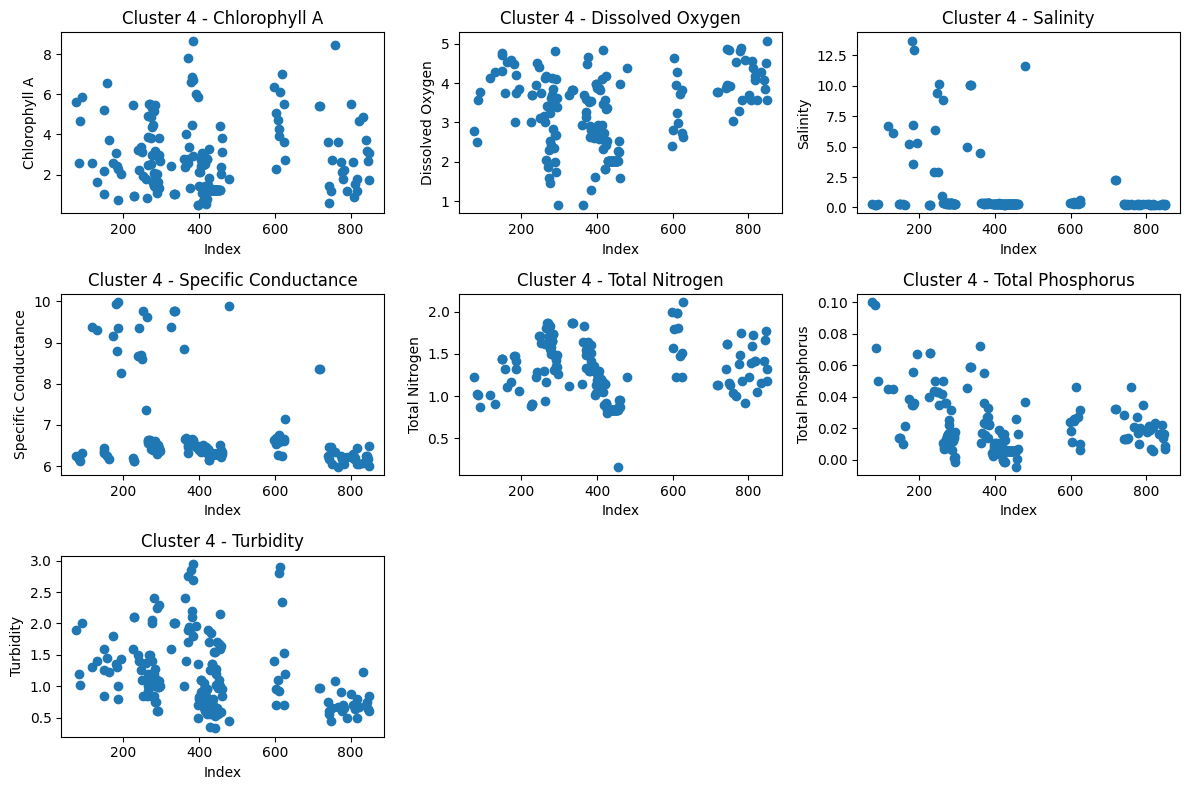

In [7]:
# Plot each cluster separately for each parameter
for cluster in range(4):
    plt.figure(figsize=(12, 8))
    cluster_indices = data[data['Cluster'] == cluster].index
    cluster_data = data[data['Cluster'] == cluster].iloc[:, 2:-1]
    for i, col in enumerate(cluster_data.columns, start=1):
        plt.subplot(3, 3, i)
        plt.scatter(cluster_indices, cluster_data[col])
        plt.xlabel('Index')
        plt.ylabel(col)
        plt.title(f'Cluster {cluster + 1} - {col}')
    plt.tight_layout()
    plt.show()

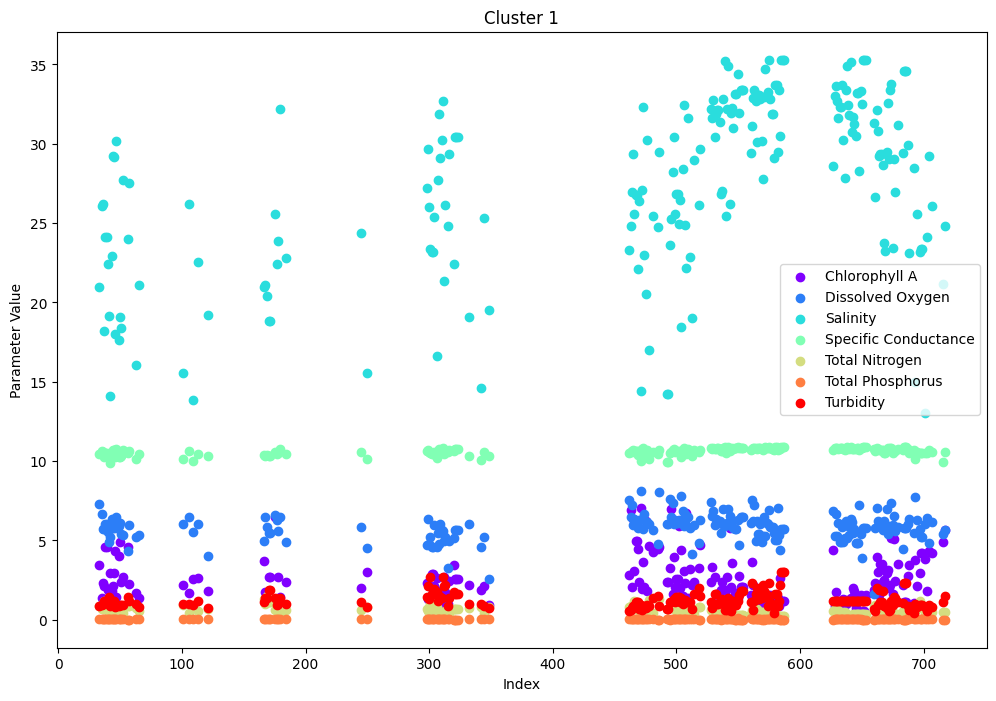

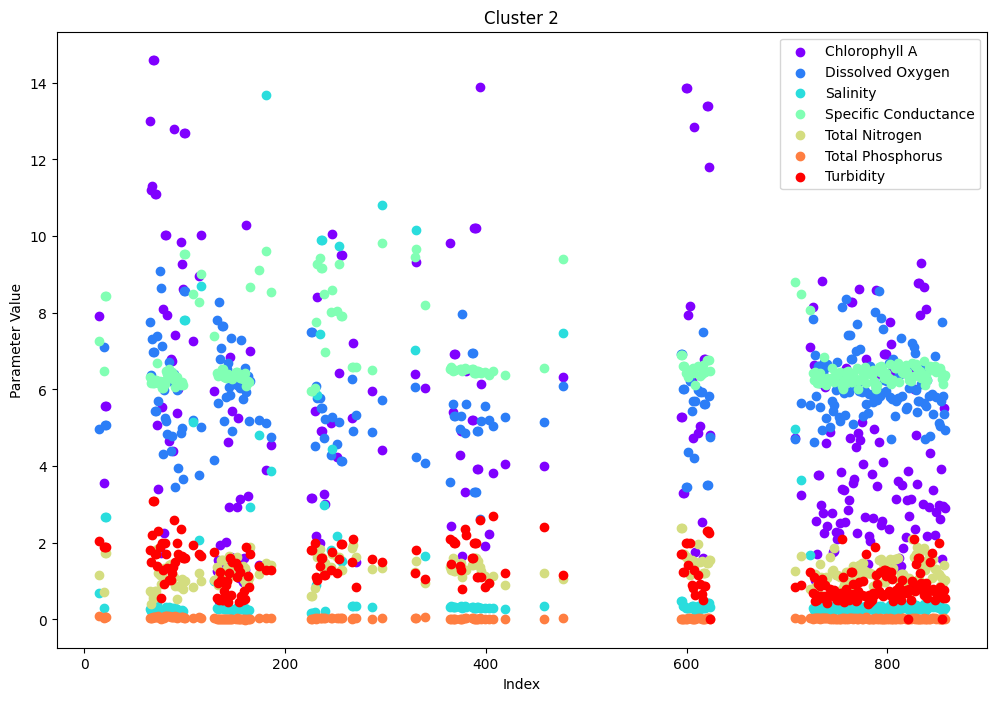

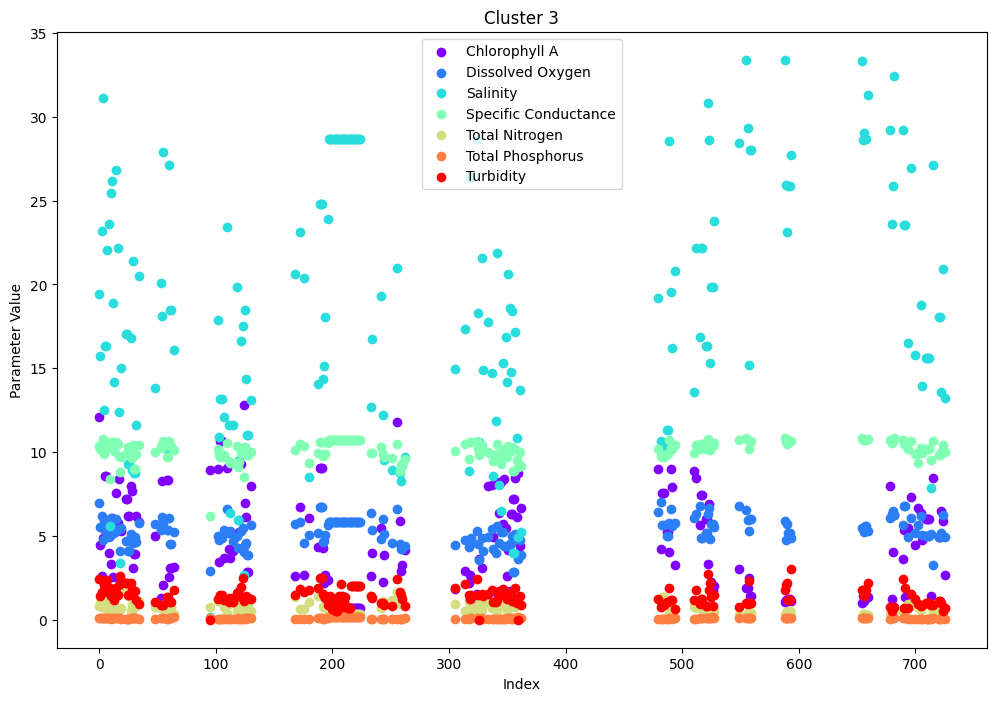

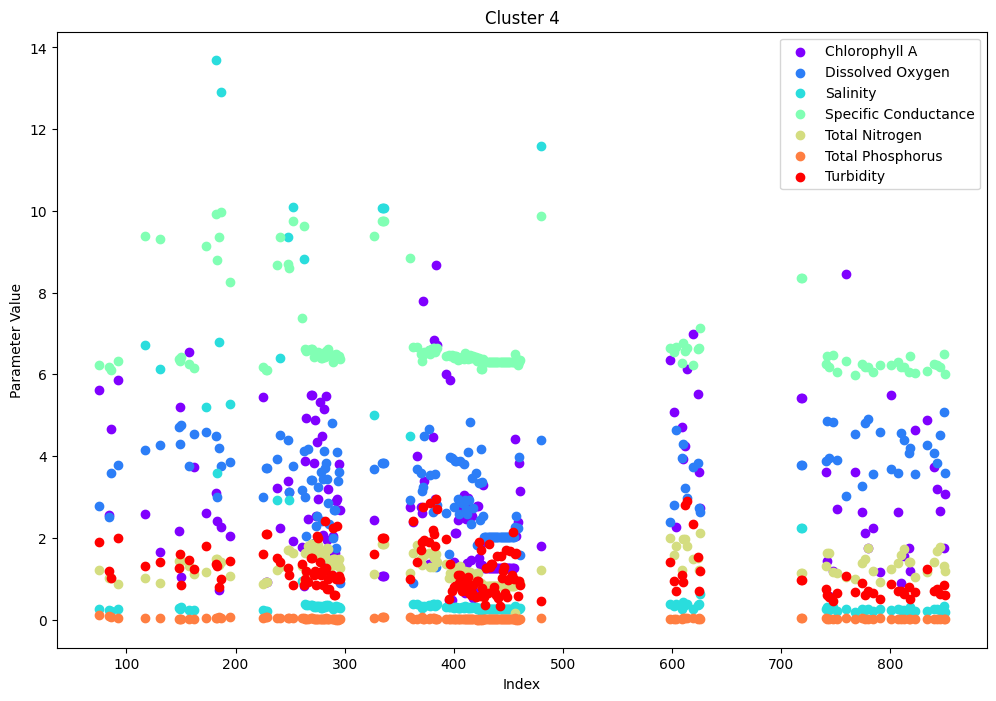

In [10]:
# Plot each cluster separately with different colors for each parameter
for cluster in range(4):
    plt.figure(figsize=(12, 8))
    cluster_indices = data[data['Cluster'] == cluster].index
    cluster_data = data[data['Cluster'] == cluster].iloc[:, 2:-1]
    colors = iter(plt.cm.rainbow(np.linspace(0, 1, len(cluster_data.columns))))  # Generate colors for each parameter
    for col in cluster_data.columns:
        plt.scatter(cluster_indices, cluster_data[col], color=next(colors), label=col)
    plt.xlabel('Index')
    plt.ylabel('Parameter Value')
    plt.title(f'Cluster {cluster + 1}')
    plt.legend()
    plt.show()
